# TASK 2 - Iris Flowers Classification

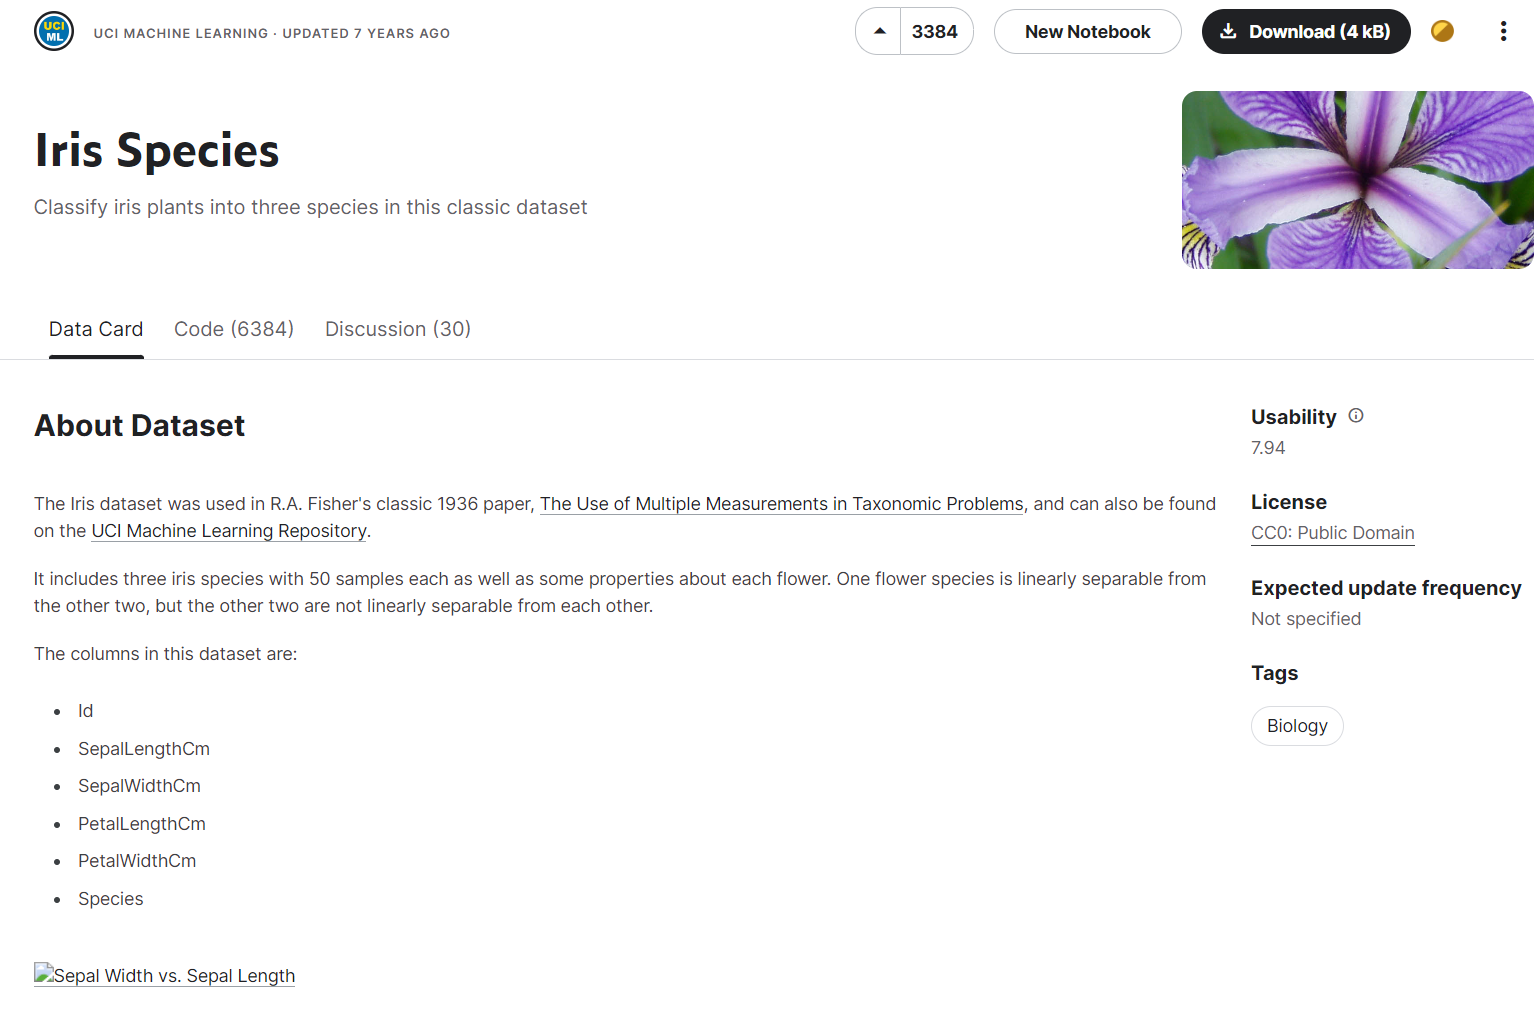

**Let's get started!**
## Check out the data
Let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
iris = pd.read_csv('iris.csv') # Load the Dataset

In [12]:
iris.drop(['Id'],axis=1,inplace=True)
iris.head() # Lets see what the dataset looks like

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Some basic statistical analysis about the data
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualize the dataset

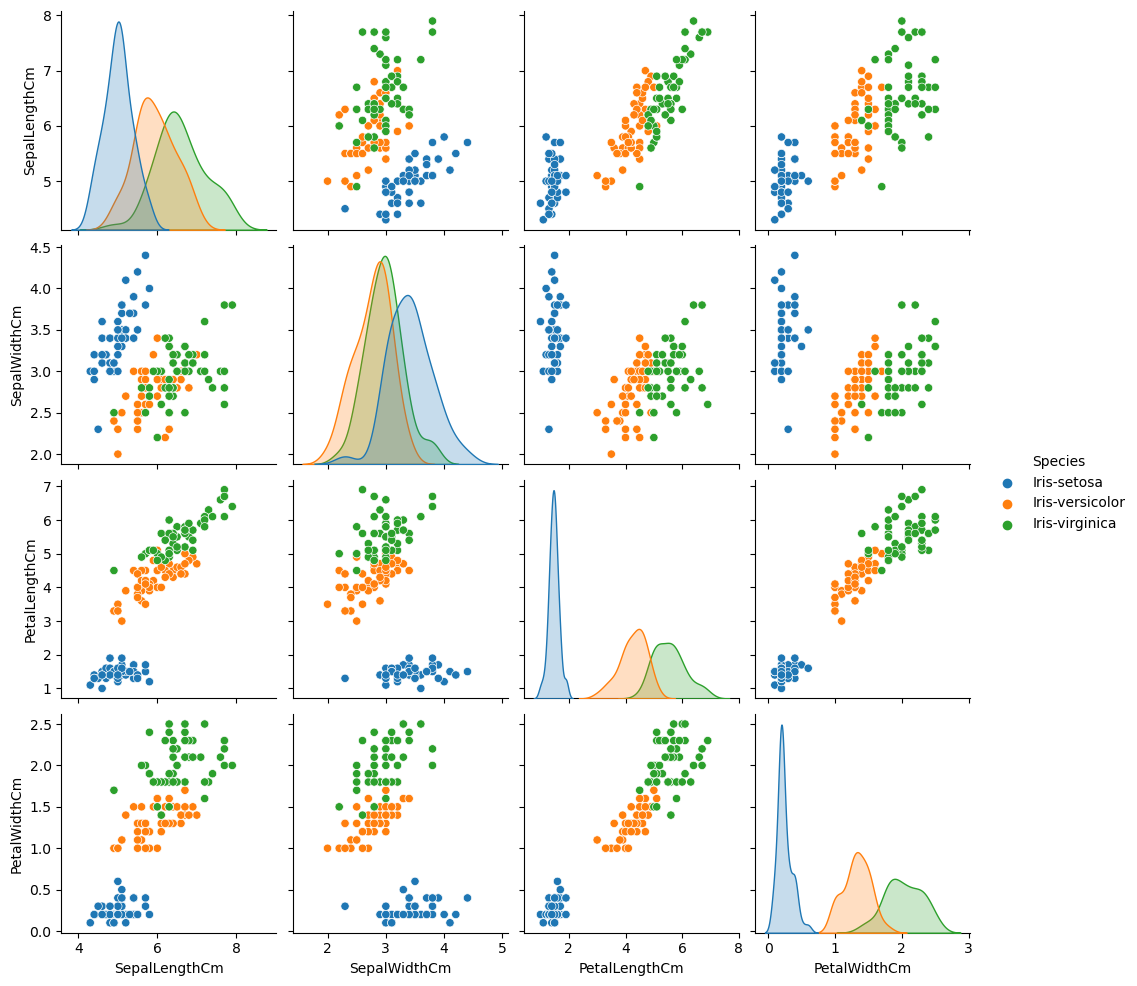

In [14]:
sns.pairplot(iris, hue='Species')

In [16]:
# Seperate features and target  
data = iris.values
X = data[:,0:4]
Y = data[:,4]

In [18]:
# Calculate avarage of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(iris.columns)-1)
width = 0.25

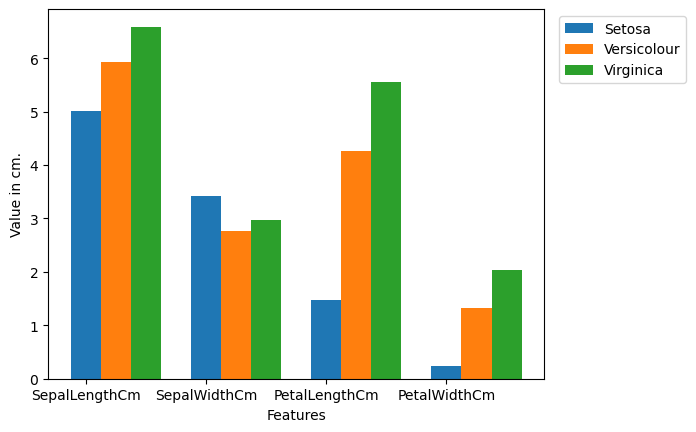

In [20]:
# Plot the avarage
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, iris.columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

## Split the Dataset into Train and Test

In [27]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Training the Classification Model

In [28]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [29]:
predictions = svn.predict(X_test)

# Results

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.81      0.90        16

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



# Conclusion

Hence, we have successfuly created a Classification Model to accurately predict the species of iris flowers using its physical features and completed Task 2 of Machine Learning Internship at Bharat Intern